### Лабораторная работа №3.2
Врублевская Екатерина, 13 группа

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
from numpy import pi, sin, exp, log, genfromtxt
import plotly.graph_objects as go
import random
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

1. Разделите таблицу на трейн и тест (70% трейн).

In [2]:
data = pd.read_csv('3-2_data.csv')
train, test = train_test_split(data, test_size=0.3)
np_train = train.to_numpy()
train_x = np.delete(np_train, (0, 2), 1)
train_y = np.delete(np_train, (0, 1), 1)

2. Определите функцию MSE

In [3]:
def mse(x: np.array, y: np.array, w1, w2):
    delta = (y - (w1 * x + w2)) ** 2
    return np.sum(delta) / len(delta)

3. Минимизируйте эту функцию с помощью градиентного спуска

In [4]:
def dw1(x: np.array, y: np.array, w1, w2):
    delta = -2 * x * (-w1 * x - w2 + y)
    return np.sum(delta) / len(delta)


def dw2(x: np.array, y: np.array, w1, w2):
    delta = -2 * (-w1 * x - w2 + y)
    return np.sum(delta) / len(delta)


def gradient(x, y, w1, w2):
    return dw1(x, y, w1, w2), dw2(x, y, w1, w2)


def gradient_descent_nesterov(x, y,w1, w2, eps, max_iterations):
    i = 0
    w1_i = w1
    w2_i = w2
    f_i = mse(x, y, w1, w2)
    gamma = 0.9
    v_w1, v_w2 = gradient(x, y, w1_i, w2_i)
    v_w1 = v_w1 * 0.001
    v_w2 = v_w2 * 0.001
    path = [[w1_i, w2_i, f_i]]
    while i < max_iterations:
        w1_grad, w2_grad = gradient(x, y, w1_i - gamma * v_w1, w2_i - gamma * v_w2)
        k = 0.001
        v_w1, v_w2 = gamma * v_w1 + k * w1_grad, gamma * v_w2 + k * w2_grad
        w1_i, w2_i = w1_i - v_w1, w2_i - v_w2
        f_i = mse(x, y, w1_i, w2_i)
        if abs(f_i - path[-1][-1]) <= eps:
            break
        path.append([w1_i, w2_i, f_i])
        i += 1

    print("Нестеров: {} итераций".format(i))
    return path

def gradient_descent(x, y, w1, w2, eps, max_iterations):
    i = 0
    w1_i = w1
    w2_i = w2
    f_i = mse(x, y, w1, w2)
    path = [[w1_i, w2_i, f_i]]
    while i < max_iterations:
        w1_grad, w2_grad = gradient(x, y, w1_i, w2_i)
        k = 0.001
        w1_i, w2_i = w1_i - k * w1_grad, w2_i - k * w2_grad
        f_i = mse(x, y, w1_i, w2_i)
        if abs(f_i - path[-1][-1]) <= eps:
            break
        path.append([w1_i, w2_i, f_i])
        i += 1

    print("Обычный спуск: {} итераций".format(i))
    return path

График функции:

In [6]:
eps = 0.00001
n_points = 400
x_range = (-5, 5)
y_range = (-5, 5)
max_iterations = 100000

X = np.linspace(x_range[0], x_range[1], n_points)
Y = np.linspace(y_range[0], y_range[1], n_points)
Z = np.zeros((n_points, n_points))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[j][i] = mse(train_x, train_y, x, y)
xyz = [go.Surface(z=Z, x=X, y=Y)]
fig = go.Figure(data=xyz)
fig.update_layout(title='f(x,y) 3D plot', autosize=False, width=1000, height=1000)

fig.show()

Минимизация функции:

In [7]:
path = gradient_descent_nesterov(train_x, train_y, 0, 0, eps, max_iterations)
w1, w2, mse_w1_w2 = path[-1][0], path[-1][1], path[-1][2]
print("w1, w2, mse(w1, w2) = ", w1, w2, mse_w1_w2)

Нестеров: 813 итераций
w1, w2, mse(w1, w2) =  -1.7296413163487567 4.042080375786412 6.66747344404519


5. Попробуйте отключить все модификации градиентного спуска

In [8]:
def gradient_descent_bad(x, y, w1, w2, eps, max_iterations):
    i = 0
    w1_i = w1
    w2_i = w2
    f_i = mse(x, y, w1, w2)
    path = [[w1_i, w2_i, f_i]]
    while i < max_iterations:
        w1_grad, w2_grad = gradient(x, y, w1_i, w2_i)
        k = 1
        w1_i, w2_i = w1_i - k * w1_grad, w2_i - k * w2_grad
        f_i = mse(x, y, w1_i, w2_i)
        if abs(f_i - path[-1][-1]) <= eps:
            break
        path.append([w1_i, w2_i, f_i])
        i += 1

    print("Спуск с плохим lr: {} итераций".format(i))
    return path

In [9]:
path_bad = gradient_descent_bad(train_x, train_y, 0, 0, eps, max_iterations)
w1_bad, w2_bad, mse_w1_w2_bad = path_bad[-1][0], path_bad[-1][1], path_bad[-1][2]
print("С плохим lr w1, w2, mse(w1, w2) = ", w1_bad, w2_bad, mse_w1_w2_bad)

<ipython-input-3-3d56b4007b1b>:2: RuntimeWarning:

overflow encountered in square

C:\Users\1111\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning:

overflow encountered in reduce

<ipython-input-8-d24899abd68a>:12: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-3-3d56b4007b1b>:2: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-4-dd6339dc2659>:7: RuntimeWarning:

invalid value encountered in multiply



Спуск с плохим lr: 100000 итераций
С плохим lr w1, w2, mse(w1, w2) =  nan nan nan


Вывод: алгоритм не смог нормально завершиться, так как с таким lr процесс не сходится или сходится медленно

6.1. Визуализируйте точки из трейна, теста и функцию y = w1*x + w2

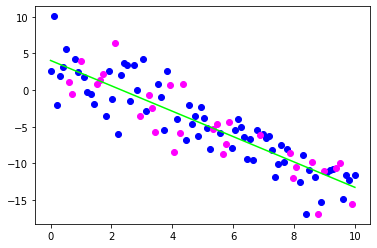

In [10]:
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, color="blue")
np_test = test.to_numpy()
test_x = np.delete(np_test, (0, 2), 1)
test_y = np.delete(np_test, (0, 1), 1)
plt.scatter(test_x, test_y, color="magenta")
x = np.linspace(0, 10, 1000)
y = w1 * x + w2
plt.plot(x, y, color="lime")
plt.show()


6.2. График функции ошибок от числа итераций

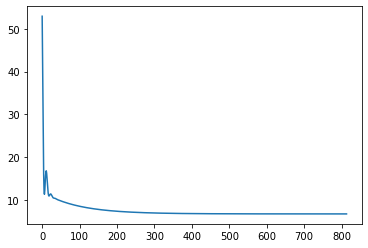

In [11]:
plt.clf()
plt.plot(list(range(0, len(path))), list(f[2] for f in path))
plt.show()

7. Метрики для тестовой выборки

Класс SimpleLinearRegression

In [12]:
class SimpleLinearRegression:
    def fit(self, x, y, eps, max_iterations, w1_0, w2_0):
        self.x = x
        self.y = y
        self.eps = eps
        self.max_iterations = max_iterations
        path = gradient_descent_nesterov(self.x, self.y, w1_0, w2_0, self.eps, self.max_iterations)
        self.w1, self.w2 = path[-1][0], path[-1][1]

    def predict(self, x):
        return self.w1 * x + self.w2

    def coefs(self):
        return self.w1, self.w2


In [13]:
reg = SimpleLinearRegression()
reg.fit(train_x, train_y, eps, max_iterations, 0, 0)
pred_y = list(reg.predict(x) for x in test_x)

w1, w2 = reg.coefs()
print("RMSE = ", sqrt(mse(test_x, test_y, w1,w2)))
print("r2_score = ", r2_score(test_y, pred_y))

Нестеров: 813 итераций
RMSE =  2.679183582048122
r2_score =  0.7800901336106538
